In [53]:
import numpy as np
import pandas as pd
data = pd.read_csv("C:\\Users\\shrouk\\Desktop\\heart_original.csv")
##data exploration
print(data.head(5))
print(data.describe(include='all'))


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA      140.0        289.0        0.0     Normal  172.0   
1   49   F           NAP      160.0        180.0        0.0     Normal  156.0   
2   37   M           ATA      130.0        283.0        0.0         ST   98.0   
3   48   F           ASY      138.0        214.0        0.0     Normal  108.0   
4   54   M           NAP      150.0        195.0        0.0     Normal  122.0   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
                Age   Sex ChestPainType    RestingBP  Cholesterol  \
count   1008.000000  1007          1007  1000.000000  1002.000000   
unique          NaN     2             4          NaN          NaN   


In [54]:
print(data.info())
print(data.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1008 non-null   int64  
 1   Sex             1007 non-null   object 
 2   ChestPainType   1007 non-null   object 
 3   RestingBP       1000 non-null   float64
 4   Cholesterol     1002 non-null   float64
 5   FastingBS       1007 non-null   float64
 6   RestingECG      1002 non-null   object 
 7   MaxHR           1003 non-null   float64
 8   ExerciseAngina  1001 non-null   object 
 9   Oldpeak         1008 non-null   float64
 10  ST_Slope        1008 non-null   object 
 11  HeartDisease    1008 non-null   int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 94.6+ KB
None
Age               0
Sex               1
ChestPainType     1
RestingBP         8
Cholesterol       6
FastingBS         1
RestingECG        6
MaxHR             5
ExerciseAngina    7
Oldpeak        

In [55]:
## only 8 rows have null values
data.dropna(inplace=True)
print(data.isna().sum())


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [56]:
print(data.duplicated().sum())
data=data.drop_duplicates()
print(data.duplicated().sum())


81
0


In [57]:
### detect outliers by box plot

q1 = data['Cholesterol'].quantile(0.25)
q3 = data['Cholesterol'].quantile(0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print("Q1 (25%) =" ,q1 ,"   ","Q3 (75%) =" ,q3,"   ","IQR =" , iqr,"   ","lower =" ,lower ,"   ","upper =" ,upper)
outlier_array = []
number_of_outlier_element = 0
for item in data['Cholesterol']:
    if(item < lower):
        outlier_array.append(item)
        number_of_outlier_element = number_of_outlier_element + 1
    elif(item > upper):
        outlier_array.append(item)
        number_of_outlier_element = number_of_outlier_element + 1
outlier_array.sort()
print("Number Of Outlier Element : ",number_of_outlier_element,"elements")
print("Number Of Non Outlier Element : ",(data['Cholesterol'].count()-number_of_outlier_element),"elements")
print(f"Outliers is : {outlier_array}")


Q1 (25%) = 174.0     Q3 (75%) = 267.0     IQR = 93.0     lower = 34.5     upper = 406.5
Number Of Outlier Element :  183 elements
Number Of Non Outlier Element :  734 elements
Outliers is : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

Text(0.5, 1.0, 'Cholesterol')

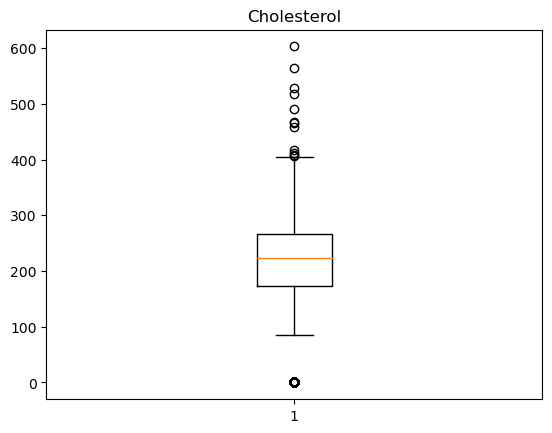

In [58]:
import matplotlib.pyplot as plt 
plt.boxplot(data['Cholesterol'])
plt.title('Cholesterol')

Q1 (25%) = 120.0     Q3 (75%) = 140.0     IQR = 20.0     lower = 90.0     upper = 170.0
Number Of Outlier Element :  28 elements
Number Of Non Outlier Element :  889 elements
Outliers is : [0.0, 80.0, 172.0, 172.0, 174.0, 178.0, 178.0, 178.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 185.0, 190.0, 190.0, 192.0, 200.0, 200.0, 200.0, 200.0]


Text(0.5, 1.0, 'RestingBP')

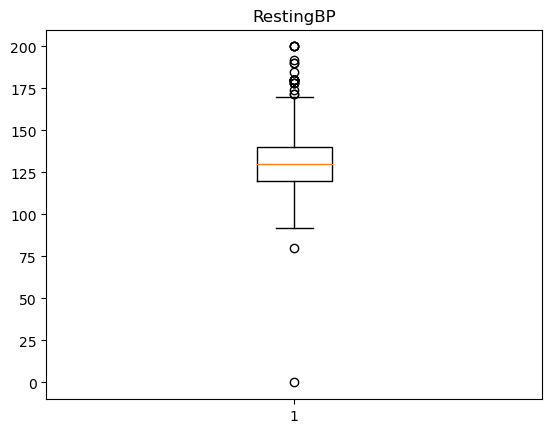

In [59]:
q1 = data['RestingBP'].quantile(0.25)
q3 = data['RestingBP'].quantile(0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print("Q1 (25%) =" ,q1 ,"   ","Q3 (75%) =" ,q3,"   ","IQR =" , iqr,"   ","lower =" ,lower ,"   ","upper =" ,upper)
outlier_array = []
number_of_outlier_element = 0
for item in data['RestingBP']:
    if(item < lower):
        outlier_array.append(item)
        number_of_outlier_element = number_of_outlier_element + 1
    elif(item > upper):
        outlier_array.append(item)
        number_of_outlier_element = number_of_outlier_element + 1
outlier_array.sort()
print("Number Of Outlier Element : ",number_of_outlier_element,"elements")
print("Number Of Non Outlier Element : ",(data['RestingBP'].count()-number_of_outlier_element),"elements")
print(f"Outliers is : {outlier_array}")

plt.boxplot(data['RestingBP'])
plt.title('RestingBP')

Text(0.5, 1.0, 'MaxHR')

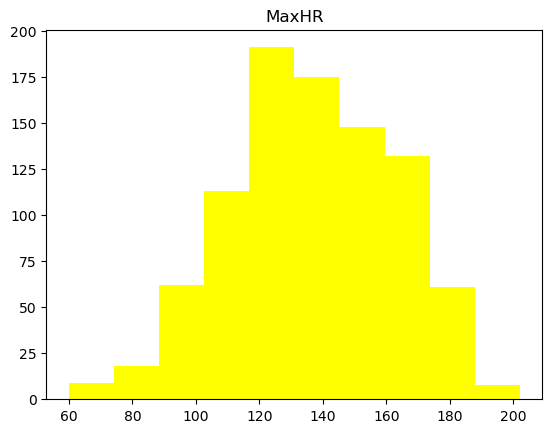

In [60]:
### detect outliers by histogram
plt.hist(data.MaxHR,bins=10,color='yellow')
plt.title('MaxHR')
## not outliers in MaxHR

In [61]:
## drop rows where Cholesterol value equal zero
data=data.drop(data[data.Cholesterol==0].index)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 957
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    float64
 4   Cholesterol     746 non-null    float64
 5   FastingBS       746 non-null    float64
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    float64
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 75.8+ KB
None


Text(0.5, 1.0, 'Cholesterol & HeartDisease')

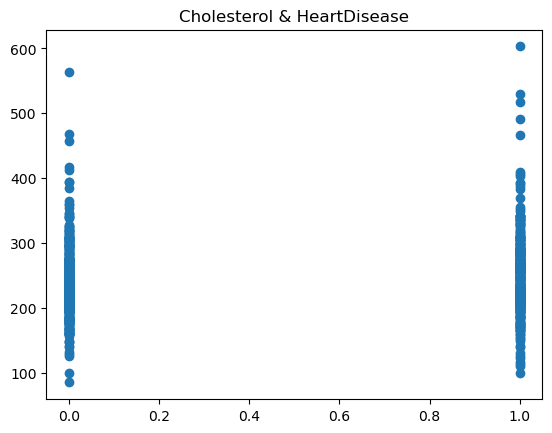

In [62]:
plt.scatter(y=data['Cholesterol'], x=data['HeartDisease'])
plt.title('Cholesterol & HeartDisease')
##Cholesterol above 400 indicates heart disease

In [63]:
# people is already have heart disease
sick=data[data['HeartDisease'] == 1]
sick.info()
sick.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 1 to 921
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             356 non-null    int64  
 1   Sex             356 non-null    object 
 2   ChestPainType   356 non-null    object 
 3   RestingBP       356 non-null    float64
 4   Cholesterol     356 non-null    float64
 5   FastingBS       356 non-null    float64
 6   RestingECG      356 non-null    object 
 7   MaxHR           356 non-null    float64
 8   ExerciseAngina  356 non-null    object 
 9   Oldpeak         356 non-null    float64
 10  ST_Slope        356 non-null    object 
 11  HeartDisease    356 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 36.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,356.000000,356,356,356.000000,356.000000,356.000000,356,356.000000,356,356.000000,356,356.0
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,Y,NaN,Flat,NaN
freq,NaN,316,274,NaN,NaN,NaN,188,NaN,237,NaN,279,NaN
mean,55.851124,NaN,NaN,136.154494,251.061798,0.230337,NaN,130.550562,NaN,1.457865,NaN,1.0
std,8.820768,NaN,NaN,17.963226,62.462713,0.421641,NaN,22.299377,NaN,1.148383,NaN,0.0
min,31.000000,NaN,NaN,92.000000,100.000000,0.000000,NaN,71.000000,NaN,0.000000,NaN,1.0
25%,50.000000,NaN,NaN,123.750000,212.000000,0.000000,NaN,115.000000,NaN,0.500000,NaN,1.0
50%,57.000000,NaN,NaN,136.000000,246.000000,0.000000,NaN,130.000000,NaN,1.500000,NaN,1.0
75%,62.000000,NaN,NaN,145.000000,283.250000,0.000000,NaN,147.000000,NaN,2.000000,NaN,1.0


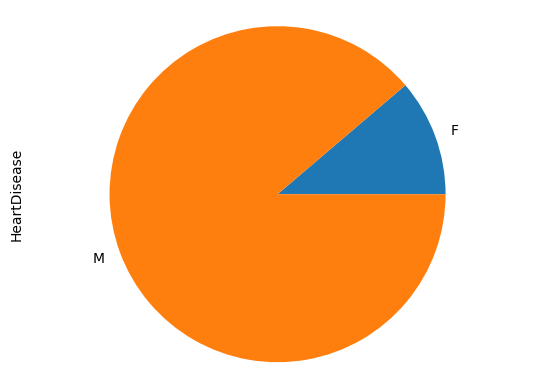

In [64]:
sick.HeartDisease.groupby(sick.Sex).sum().plot(kind='pie')
plt.axis('equal')
plt.show()
## The percentage of men with heart disease is more than that of women

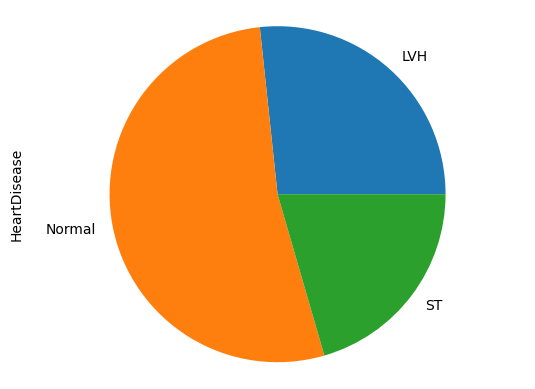

In [65]:
sick.HeartDisease.groupby(sick.RestingECG).sum().plot(kind='pie')
plt.axis('equal')
plt.show()
# More than half of people with heart disease have an regular heartbeat

<Axes: xlabel='ChestPainType', ylabel='patients with heart disease'>

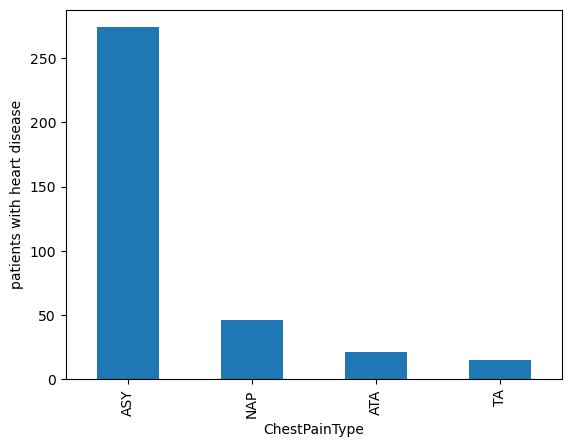

In [66]:
sick['ChestPainType'].value_counts().plot(kind='bar',xlabel='ChestPainType',ylabel='patients with heart disease')
# Most of those who feel TA or ATA (typical angina) do not have heart disease
# Most people who feel the pain of angina asymptomatic(ASY), has a heart disease

In [67]:
data["ST_Slope"]=data["ST_Slope"].replace({"Flat":1, "Up":2,"Down":0}, inplace=False)
data["ExerciseAngina"]=data["ExerciseAngina"].replace({"N": 0, "Y":1}, inplace=False)
data["RestingECG"]=data["RestingECG"].replace({"Normal":0, "ST":1,"LVH":2}, inplace=False)
data["Sex"]=data["Sex"].replace({"M": 1, "F":0}, inplace=False)
data["ChestPainType"]=data["ChestPainType"].replace({"ATA": 0, "TA":1,"NAP": 2, "ASY":3}, inplace=False)

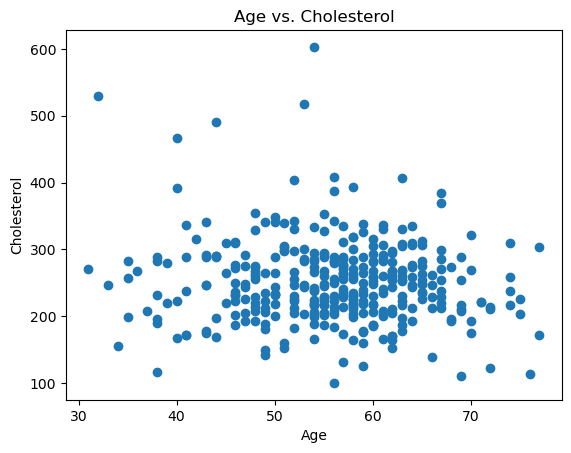

In [68]:
plt.scatter(x='Age', y='Cholesterol', data=sick)
plt.title('Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()
##Cholesterol level for people with heart disease in range[150:350]

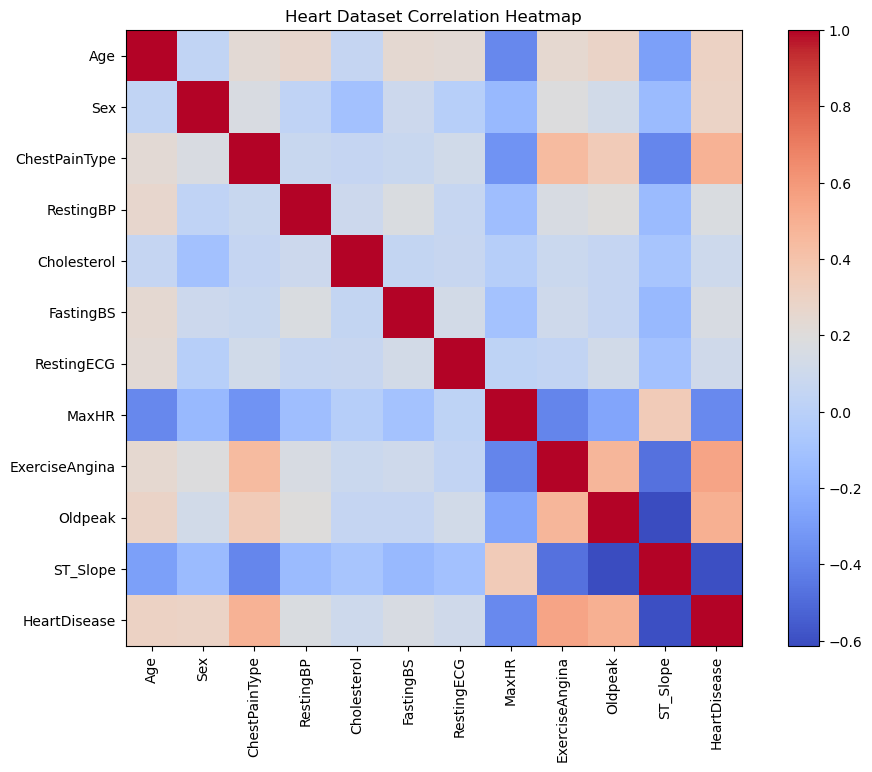

In [69]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
plt.title('Heart Dataset Correlation Heatmap')
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(corr_matrix.columns))]
plt.xticks(tick_marks, corr_matrix.columns, rotation=90)
plt.yticks(tick_marks, corr_matrix.columns)
plt.show()

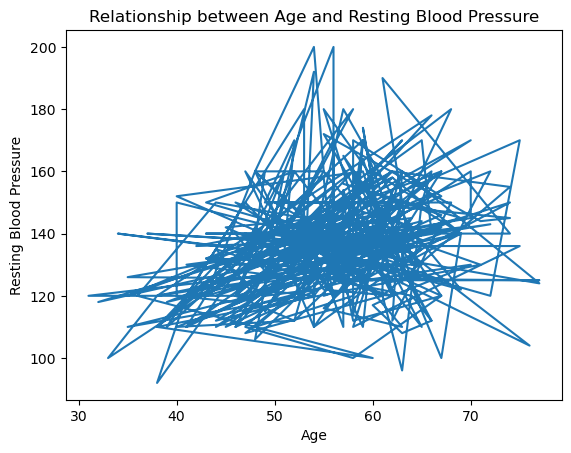

In [70]:
plt.plot(sick['Age'], sick['RestingBP'])
plt.title('Relationship between Age and Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

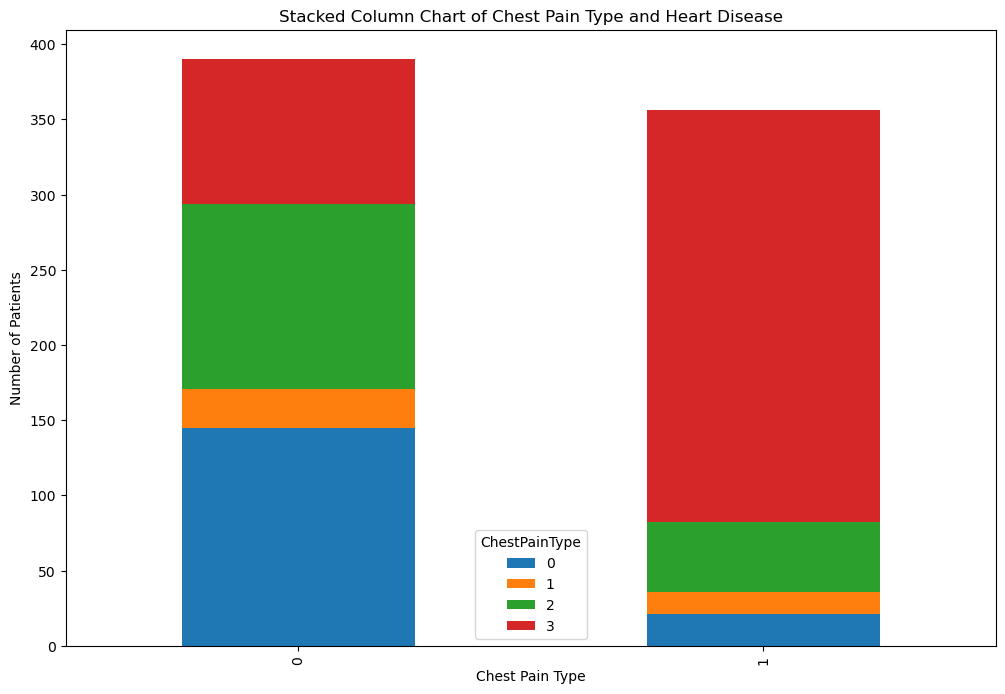

In [71]:
feature_counts = data.groupby(['HeartDisease', 'ChestPainType'])['Age'].count().unstack()


ax = feature_counts.plot(kind='bar', stacked=True, figsize=(12,8))
ax.set_xlabel('Chest Pain Type')
ax.set_ylabel('Number of Patients')
ax.set_title('Stacked Column Chart of Chest Pain Type and Heart Disease')
plt.show()


In [72]:
x=data[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina'
        ,'Oldpeak','ST_Slope']]
y=data[['HeartDisease']]
print(x.shape)
print(y.shape)

(746, 11)
(746, 1)


In [73]:
#split data to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [75]:
#implement GNB Classifier
from sklearn.naive_bayes import GaussianNB
nv=GaussianNB()
nv.fit(x_train,y_train)

C:\Users\shrouk\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [76]:
from sklearn.metrics import accuracy_score
predict=nv.predict(x_test)
accuracy_score(y_test,predict)


0.84

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict)

array([[48, 29],
       [27, 46]], dtype=int64)

In [84]:
#implement Decision Tree Classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

In [90]:
predict=dtree.predict(x_test)
accuracy_score(y_test,predict)


0.8

In [91]:
confusion_matrix(y_test,predict)

array([[65, 12],
       [18, 55]], dtype=int64)

[Text(0.5718118686868687, 0.9666666666666667, 'ST_Slope <= 1.5\ngini = 0.499\nsamples = 596\nvalue = [313, 283]'),
 Text(0.29261363636363635, 0.9, 'Sex <= 0.5\ngini = 0.341\nsamples = 316\nvalue = [69, 247]'),
 Text(0.11363636363636363, 0.8333333333333334, 'ExerciseAngina <= 0.5\ngini = 0.496\nsamples = 59\nvalue = [32, 27]'),
 Text(0.06060606060606061, 0.7666666666666667, 'FastingBS <= 0.5\ngini = 0.375\nsamples = 32\nvalue = [24, 8]'),
 Text(0.050505050505050504, 0.7, 'RestingBP <= 148.0\ngini = 0.32\nsamples = 30\nvalue = [24, 6]'),
 Text(0.030303030303030304, 0.6333333333333333, 'MaxHR <= 97.5\ngini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(0.020202020202020204, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04040404040404041, 0.5666666666666667, 'MaxHR <= 173.5\ngini = 0.147\nsamples = 25\nvalue = [23, 2]'),
 Text(0.020202020202020204, 0.5, 'Cholesterol <= 278.5\ngini = 0.083\nsamples = 23\nvalue = [22, 1]'),
 Text(0.010101010101010102, 0.43333333333

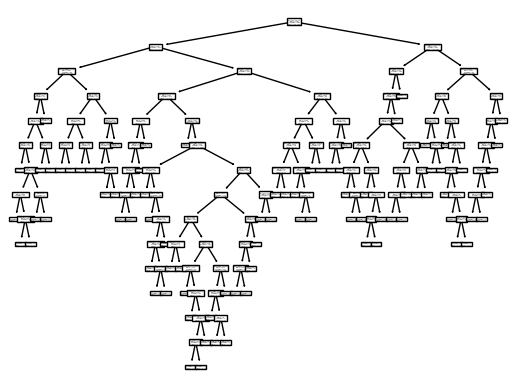

In [92]:
from sklearn import tree
features = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina'
        ,'Oldpeak','ST_Slope']
tree.plot_tree(dtree, feature_names=features)

In [94]:
#implement knn Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
predict=knn.predict(x_test)
accuracy_score(y_test,predict)

C:\Users\shrouk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6266666666666667